In [1]:
import os
import xarray as xr
import sys
import itertools
from itertools import zip_longest
import pandas as pd
import numpy as np
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
#list(colormaps)
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.style.use('tableau-colorblind10') #seaborn-v0_8-whitegrid  

In [2]:
with open('../dlcia_output/final_allV_mod/BEV_comb_final_ds_50dict.pkl', 'rb') as f:
    bev = pickle.load(f)

with open('../dlcia_output/final_allV_mod/ICEVd_comb_final_ds_1dict.pkl', 'rb') as f:
    icev = pickle.load(f)

In [3]:
mybev_tech = {'V1A_V1B_init': 'NMC622', 'F2_fuel_elec': 'grid', 'V1B_repl': 'NMC622'}
for i in range(len(bev)):  
    if (bev[i][0]) ==  mybev_tech:
        print(i)

44


In [4]:
mybevds = bev[44][1]

In [5]:
myicevds = icev[0][1]
myicevds

<xarray.Dataset>
Dimensions:    (SSP: 3, v_year: 3, dpLCA_IC: 3, lcia_year: 121)
Coordinates:
  * SSP        (SSP) object 'ssp119' 'ssp245' 'ssp585'
  * v_year     (v_year) int32 2030 2040 2050
  * dpLCA_IC   (dpLCA_IC) object 'dpIRF' 'dpCRF' 'dpGWP'
  * lcia_year  (lcia_year) int32 0 1 2 3 4 5 6 7 ... 114 115 116 117 118 119 120
Data variables:
    dplcia     (SSP, v_year, dpLCA_IC, lcia_year) float64 2.503e-10 ... nan

### for BEV, we select {'V1A_V1B_init': 'NMC622', 'F2_fuel_elec': 'grid', 'V1B_repl': 'NMC622'}

### dpCRF - final ICEV vs. BEV 

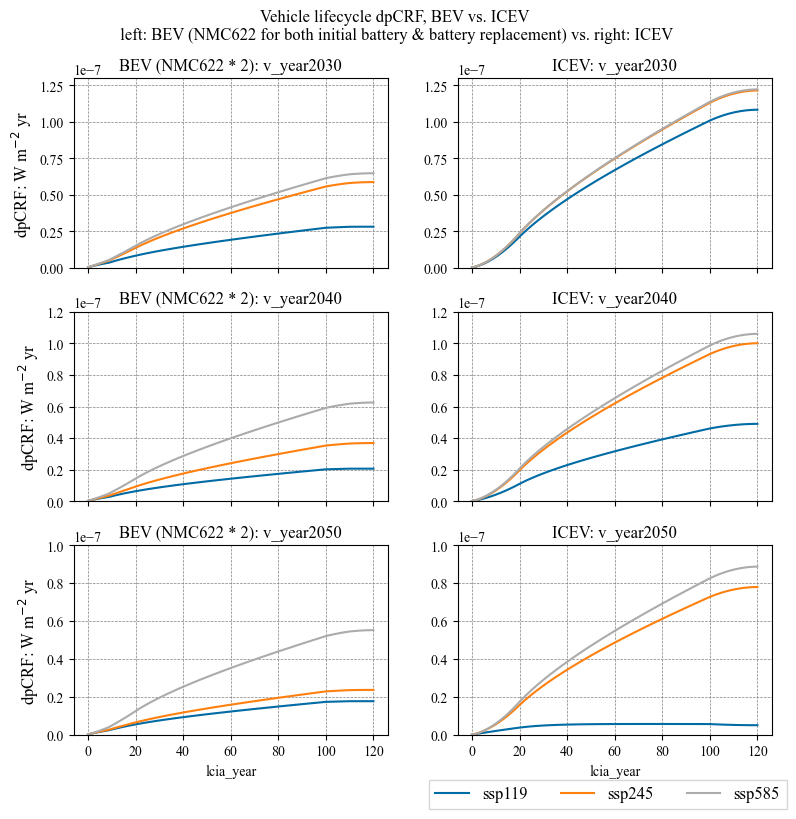

In [6]:
fig, axs = plt.subplots(3, 2, figsize=( 8, 8 ))
vylist = [2030, 2040, 2050] 
for i, vy in zip( range(3), vylist):
    for j in range(2) : 
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        axs[0,0].set_ylim(0, 13e-8) 
        axs[0,1].set_ylim(0, 13e-8) 
        axs[1,0].set_ylim(0, 12e-8) 
        axs[1,1].set_ylim(0, 12e-8)
        axs[2,0].set_ylim(0, 10e-8) 
        axs[2,1].set_ylim(0, 10e-8)
        
        ax = axs[i,j]
        if j == 0: 
            yy_bev = mybevds.sel(v_year = vy, SSP = ['ssp119', 'ssp245', 'ssp585'], dpLCA_IC = 'dpCRF')['dplcia']
            yy_bev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV (NMC622 * 2): v_year" +  str(vy)
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m$^{-2}$ yr',fontsize=12) 
            
        elif j == 1: 
            yy_icev = myicevds.sel(v_year = vy,  SSP = ['ssp119', 'ssp245', 'ssp585'], dpLCA_IC = 'dpCRF')['dplcia']
            yy_icev.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "ICEV: v_year" +  str(vy) 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel(' ')
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp245', 'ssp585' ]
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4, prop={'size': 12})


tt = 'Vehicle lifecycle dpCRF, BEV vs. ICEV' + '\n left: BEV (NMC622 for both initial battery & battery replacement) vs. right: ICEV'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.savefig('Fig7_ICEVvsBEV.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
aa ,bb = [],[]

for v_y in [2030, 2040, 2050]: 
    for sp in ['ssp119',  'ssp245', 'ssp585' ]: 
        a =  mybevds.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        b =  myicevds.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        diff = (b.values[-1] - a.values[-1]) / b.values[-1]
        diff2 = (a.values[-1] - b.values[-1]) / a.values[-1]
        print(f"for v_year{v_y}, {sp}, ICEVd vs. BEV % diff is {diff}" )
        #print(f"for v_year{v_y}, {sp}, BEV vs ICEVd % diff is {diff2}" )

for v_year2030, ssp119, ICEVd vs. BEV % diff is 0.7396518465459285
for v_year2030, ssp245, ICEVd vs. BEV % diff is 0.5162684852481562
for v_year2030, ssp585, ICEVd vs. BEV % diff is 0.46991216645172235
for v_year2040, ssp119, ICEVd vs. BEV % diff is 0.5772608700938301
for v_year2040, ssp245, ICEVd vs. BEV % diff is 0.6308107679651207
for v_year2040, ssp585, ICEVd vs. BEV % diff is 0.40961027097560115
for v_year2050, ssp119, ICEVd vs. BEV % diff is -2.440713465781519
for v_year2050, ssp245, ICEVd vs. BEV % diff is 0.6950048903522161
for v_year2050, ssp585, ICEVd vs. BEV % diff is 0.3771919106894529


In [8]:
aa ,bb = [],[]

for v_y in [2030, 2040, 2050]: 
    for sp in ['ssp119',  'ssp245', 'ssp585' ]: 
        a =  mybevds.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        b =  myicevds.sel(v_year = v_y, SSP = sp , dpLCA_IC = 'dpCRF')['dplcia']
        #diff = (b.values[-1] - a.values[-1]) / b.values[-1]
        diff2 = (a.values[-1] - b.values[-1]) / a.values[-1]
        #print(f"for v_year{v_y}, {sp}, ICEVd vs. BEV % diff is {diff}" )
        print(f"for v_year{v_y}, {sp}, BEV vs ICEVd % diff is {diff2}" )

for v_year2030, ssp119, BEV vs ICEVd % diff is -2.8410105342898553
for v_year2030, ssp245, BEV vs ICEVd % diff is -1.0672624575907645
for v_year2030, ssp585, BEV vs ICEVd % diff is -0.886479818459982
for v_year2040, ssp119, BEV vs ICEVd % diff is -1.3655250466687516
for v_year2040, ssp245, BEV vs ICEVd % diff is -1.7086380458288244
for v_year2040, ssp585, BEV vs ICEVd % diff is -0.6937964040337723
for v_year2050, ssp119, BEV vs ICEVd % diff is 0.7093626046036178
for v_year2050, ssp245, BEV vs ICEVd % diff is -2.278741095733717
for v_year2050, ssp585, BEV vs ICEVd % diff is -0.6056310397429279
